In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


In [ ]:
 

# Load dataset, first column as index (label)
dataset = pd.read_csv('results/alon/signatures_real_names.csv', index_col=0)
# Fill NaN values with column mean
dataset = dataset.fillna(dataset.mean())
labels_df = pd.DataFrame(dataset.index, columns=['Label'])

# Features: all columns except the first (label)
X = dataset.values  # shape: (n_samples, 199) if index_col=0
X

array([[-1.09209413e-03, -2.99202263e-04, -1.06997823e-04, ...,
         7.89400949e-06, -6.89041187e-06,  6.88408921e-06],
       [-1.98126636e-04, -3.09331617e-04, -1.15913682e-04, ...,
         7.89400949e-06, -6.89041187e-06,  6.88408921e-06],
       [-6.40121553e-05, -2.99609587e-04, -1.34553785e-04, ...,
         7.89400949e-06, -6.89041187e-06,  6.88408921e-06],
       ...,
       [-4.20241346e-05,  2.31849563e-04,  1.84632996e-04, ...,
         7.89400949e-06, -6.89041187e-06,  6.88408921e-06],
       [-4.20241346e-05,  9.84990654e-05,  1.84346939e-04, ...,
         7.89400949e-06, -6.89041187e-06,  6.88408921e-06],
       [-4.20241346e-05,  5.48772271e-04,  2.88446372e-04, ...,
         7.89400949e-06, -6.89041187e-06,  6.88408921e-06]])

In [101]:

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


     

In [102]:

labels_df.head()

,Label
0,A1
1,A2
2,A3
3,A4
4,A5


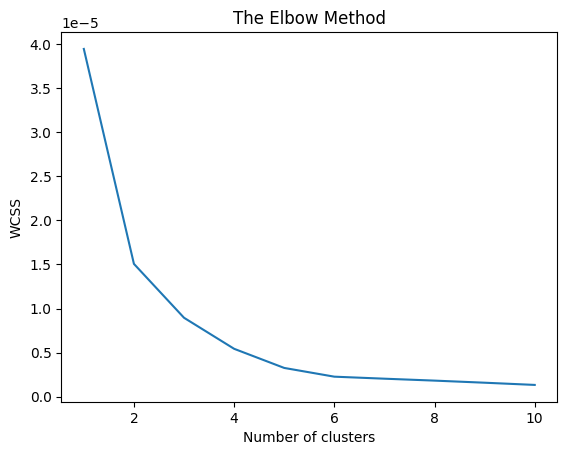

In [103]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [ ]:
# Merge index, y_kmeans, and labels_df into one DataFrame
results_df = pd.DataFrame({
    'Index': dataset.index,
    'Label': labels_df['Label'],
    'Cluster': y_kmeans
})
results_df.head()
save = results_df.to_csv('results/alon/clustered_signatures.csv', index=False)

,Index,Label,Cluster
0,A1,A1,2
1,A2,A2,2
2,A3,A3,2
3,A4,A4,2
4,A5,A5,2


In [128]:
# Load the additional CSV files
metadata_df = pd.read_csv('results/alon/sample_metadata.csv')
pca_df = pd.read_csv('results/alon/pca_df.csv')

# Merge results_df with metadata_df on 'Index'
merged_df = pd.merge(results_df, metadata_df, left_on='Index', right_on='sample', how='left')
merged_df.head() 
# Merge with pca_df on 'Index'
merged_df = pd.merge(merged_df, pca_df, left_on='Index', right_on='alias', how='left')

merged_df.head()

,Index,Label,Cluster,sample,strain,condition,differentiation,PC1,PC2,alias
0,A1,A1,2,A1,WT1,ctrl,Th17p,0.202557,0.344324,A1
1,A2,A2,2,A2,JMJD3CKO1,ctrl,Th17p,-0.255689,-0.865087,A2
2,A3,A3,2,A3,WT1,DFMO,Th17p,-0.270923,-0.932323,A3
3,A4,A4,2,A4,JMJD3CKO1,DFMO,Th17p,-0.305060,-0.914274,A4
4,A5,A5,2,A5,WT2,ctrl,Th17p,-0.290223,-0.919635,A5


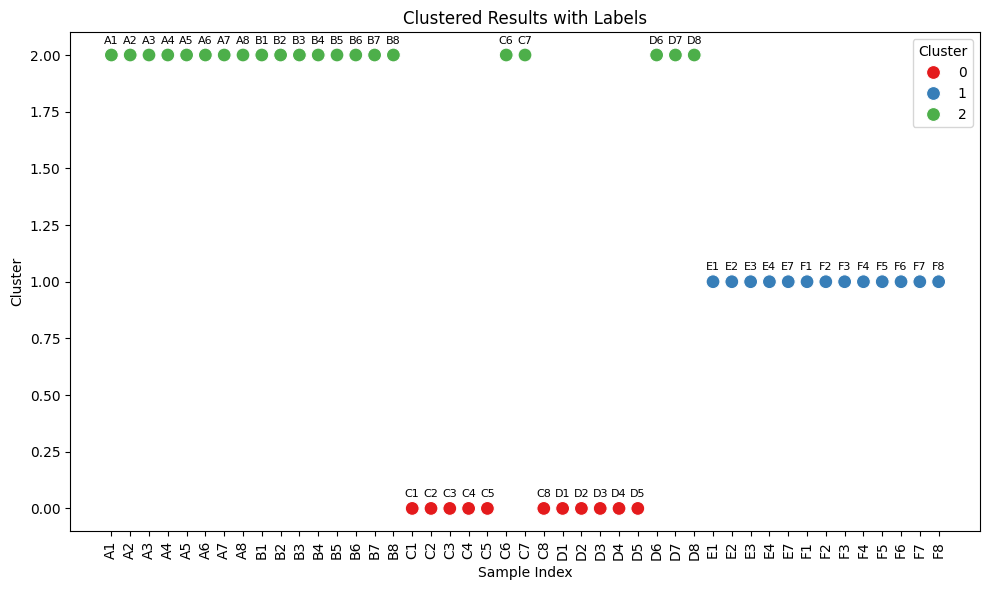

In [116]:
import seaborn as sns

# Load clustered results from CSV
clustered_df = pd.read_csv('results/alon/clustered_signatures.csv')

# Plot clusters with seaborn, showing labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=clustered_df,
    x='Index',
    y='Cluster',
    hue='Cluster',
    palette='Set1',
    legend='full',
    s=100
)

# Annotate each point with its label
for i, row in clustered_df.iterrows():
    plt.text(row['Index'], row['Cluster'] + 0.05, str(row['Label']), 
             horizontalalignment='center', fontsize=8)

plt.title('Clustered Results with Labels')
plt.xlabel('Sample Index')
plt.ylabel('Cluster')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/sx/3m4vwgws0bb929t0x6n3x5sh0000gn/T/ipykernel_58231/1311682803.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


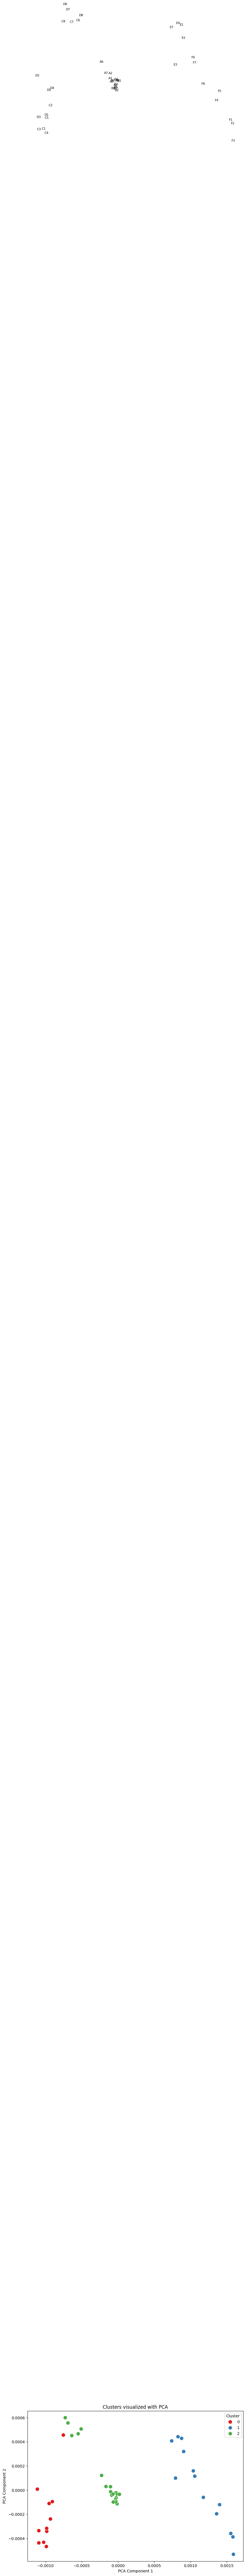

In [119]:
from sklearn.decomposition import PCA
import seaborn as sns

# Assuming you have PCA results in a variable, e.g., pca_result with shape (n_samples, 2)
# If not, compute PCA on X:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA coordinates to results_df for plotting
results_df['PCA1'] = pca_result[:, 0]
results_df['PCA2'] = pca_result[:, 1]


plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=results_df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set1',
    s=100,
    legend='full'
)

# Annotate each point with its label
for _, row in results_df.iterrows():
    plt.text(row['PCA1'], row['PCA2'] + 0.02, str(row['Label']), 
             horizontalalignment='center', fontsize=8)

plt.title('Clusters visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

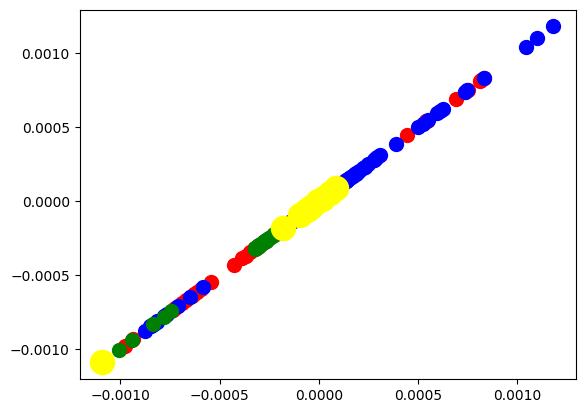

In [114]:
# plot results_df
plt.scatter(X[y_kmeans == 0], X[y_kmeans == 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1], X[y_kmeans == 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2], X[y_kmeans == 2], s = 100, c = 'green', label = 'Cluster 3')  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300   , c = 'yellow', label = 'Centroids')


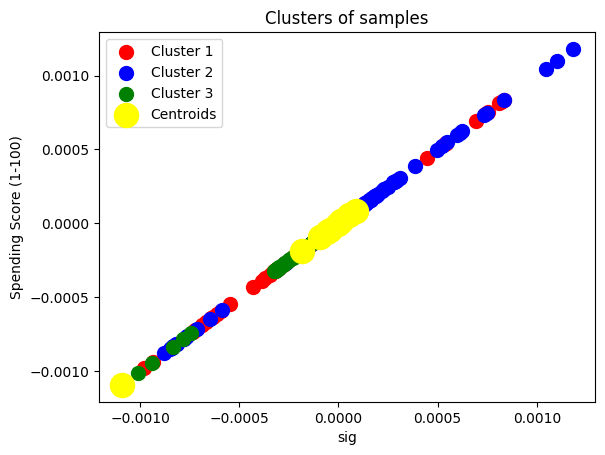

In [113]:
plt.scatter(X[y_kmeans == 0], X[y_kmeans == 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1], X[y_kmeans == 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2], X[y_kmeans == 2], s = 100, c = 'green', label = 'Cluster 3')  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300   , c = 'yellow', label = 'Centroids')
plt.title('Clusters of samples')
plt.xlabel('sig')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()